#As usual, I start out by loading all the packages

In [5]:
import nltk
nltk.download('stopwords')
import string
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
tweets = pd.read_csv('/content/drive/My Drive/Colab Notebooks/aug15_sample.csv')

#This is what the dataset looks like:
tweets.head()

,id,user_id,user_name,screen_name,user_statuses_count,user_favorites_count,friends_count,followers_count,user_location,user_description,user_time_zone,user_profile_text_color,user_profile_background_color,full_text,created_at,is_retweet,retweeted_status_text,retweeted_status_id,quoted_status_text,quoted_status_id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,hashtags
0,897661668787982336,2912874772,KCR,kc_race,428,381,250,32,philly,Communications profesh. Giving everything majo...,NaN,000000,000000,It's almost as if people are exactly who they ...,2017-08-16 03:29:54,f,NaN,NaN,"""Charlottesville suspect was known as “the Naz...",8.975583e+17,NaN,NaN,NaN,NaN
1,897654901534228480,4840680143,Rory Hart,OpenHartnMinds,5544,3503,510,62,"Connecticut, USA","Educator, Coach, Ally, Activist",NaN,333333,F5F8FA,"@Slate Conservative media: Yes, Trump's respon...",2017-08-16 03:03:00,f,NaN,NaN,NaN,NaN,OpenHartnMinds,8.976548e+17,4.840680e+09,NaN
2,897659748597870592,2884196456,Lee Valentine Smith,leevsmith,9425,49365,5168,6726,"NY, London, Paris, Munich.","Writer-artist-activist-contrarian. No debates,...",NaN,000000,000000,👀 https://t.co/qeyzYeblwu,2017-08-16 03:22:16,f,NaN,NaN,"""WATCH: WH Chief John Kelly reacts to Trump's ...",8.976497e+17,NaN,NaN,NaN,NaN
3,897660496656179202,733618527282814976,Karabo J.R Ramasodi,kjr_inkguy,3374,805,108,45,"Pretoria, South Africa",|Events Guy|\n●Both Problem and Situation●\n♤T...,NaN,333333,F5F8FA,😂 😂 😂 Karma really isn't wasting time.. https:...,2017-08-16 03:25:14,f,NaN,NaN,"""#NEW: #Charlottesville murder suspect can't a...",8.971070e+17,NaN,NaN,NaN,NaN
4,897642311903055872,4388881763,ProudTrumpwoman,pmswolfy,120434,61111,805,2263,"Salem, VA","Wife, mother, and teacher never been involved ...",NaN,333333,C0DEED,"After Charlottesville, Black Lives Matter Issu...",2017-08-16 02:12:59,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Tokening text and getting rid of all the stopwords. Finally store most frequently mentioned keywords in rslt variable.

In [6]:
top_N = 30
stopwords = nltk.corpus.stopwords.words('english')
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (tweets['full_text']
           .str.lower()
           .replace([r'\|', RE_stopwords, r"(&amp)|,|;|\"|\.|\?|’|!|'|:|-|\\|/|https"], [' ', ' ', ' '], regex=True)
           .str.cat(sep=' ')
           .split()
)

In [7]:
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

rslt = rslt.iloc[1:]

In [8]:
rslt

,Frequency
Word,
charlottesville,18820
trump,10582
#charlottesville,7596
white,3861
via,2885
@realdonaldtrump,2698
violence,2563
sides,2212
people,2168


#Here comes the top keywords uttered by Twitter users

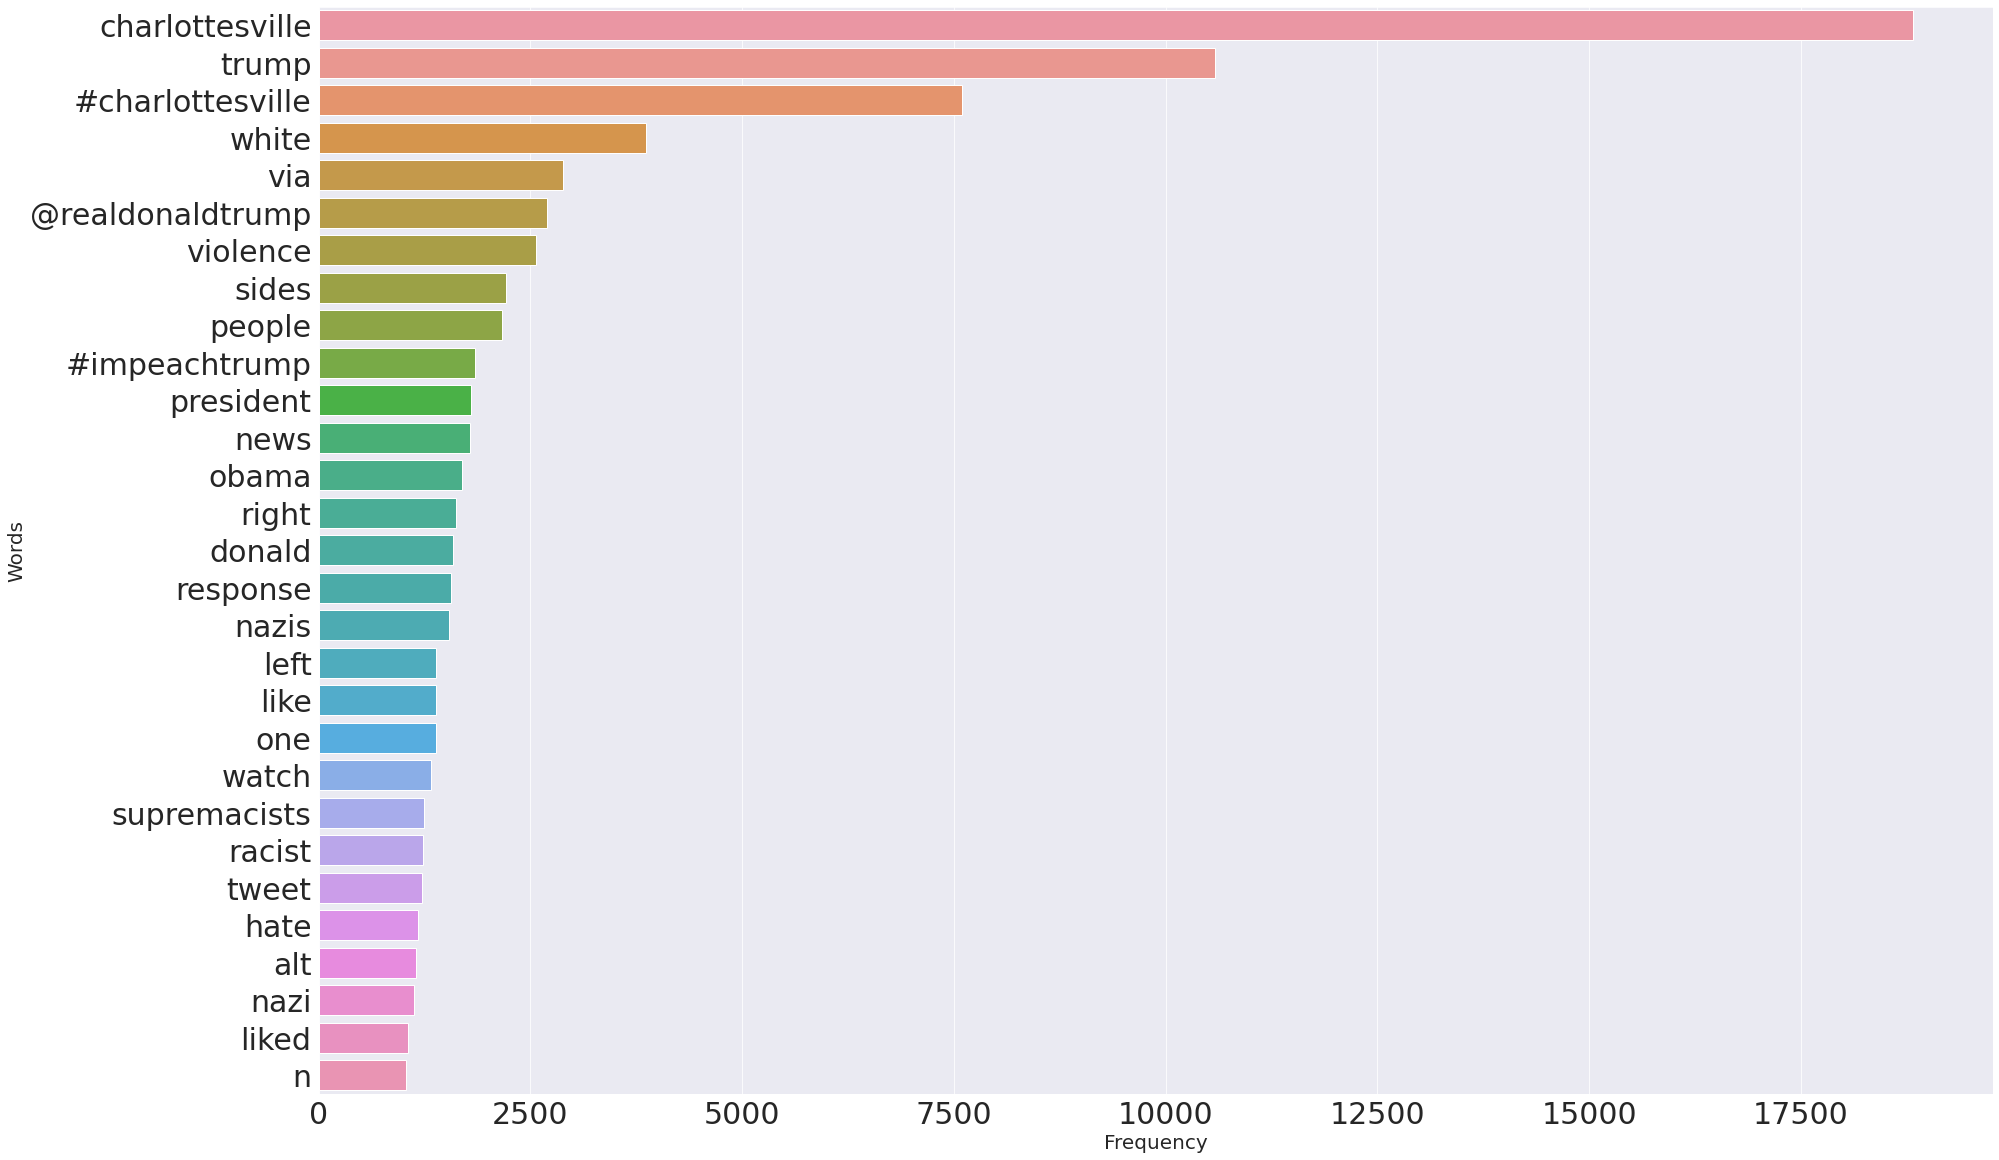

In [9]:
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = [30.0, 20.0]
ax = sns.barplot(y=rslt.index, x='Frequency', data=rslt)
ax.set_xlabel("Frequency",fontsize=20)
ax.set_ylabel("Words",fontsize=20)
ax.tick_params(labelsize=30)

#Most frequently used hashtags

In [10]:
tags = (tweets['hashtags']
           .str.lower()
           .str.cat(sep=' ')
           .split()
)

hashtgs = pd.DataFrame(Counter(tags).most_common(top_N),
                    columns=['Hashtags', 'Frequency']).set_index('Hashtags')
hashtgs = hashtgs.iloc[1:]

In [11]:
hashtgs

,Frequency
Hashtags,
"""impeachtrump""",1721
"""trump""",920
"""maga""",393
"""resist""",262
"""antifa""",234
"""news""",229
"""altright""",162
"""impeach""",154
"""impeach45""",151


#Plotting most frequently used hashtags

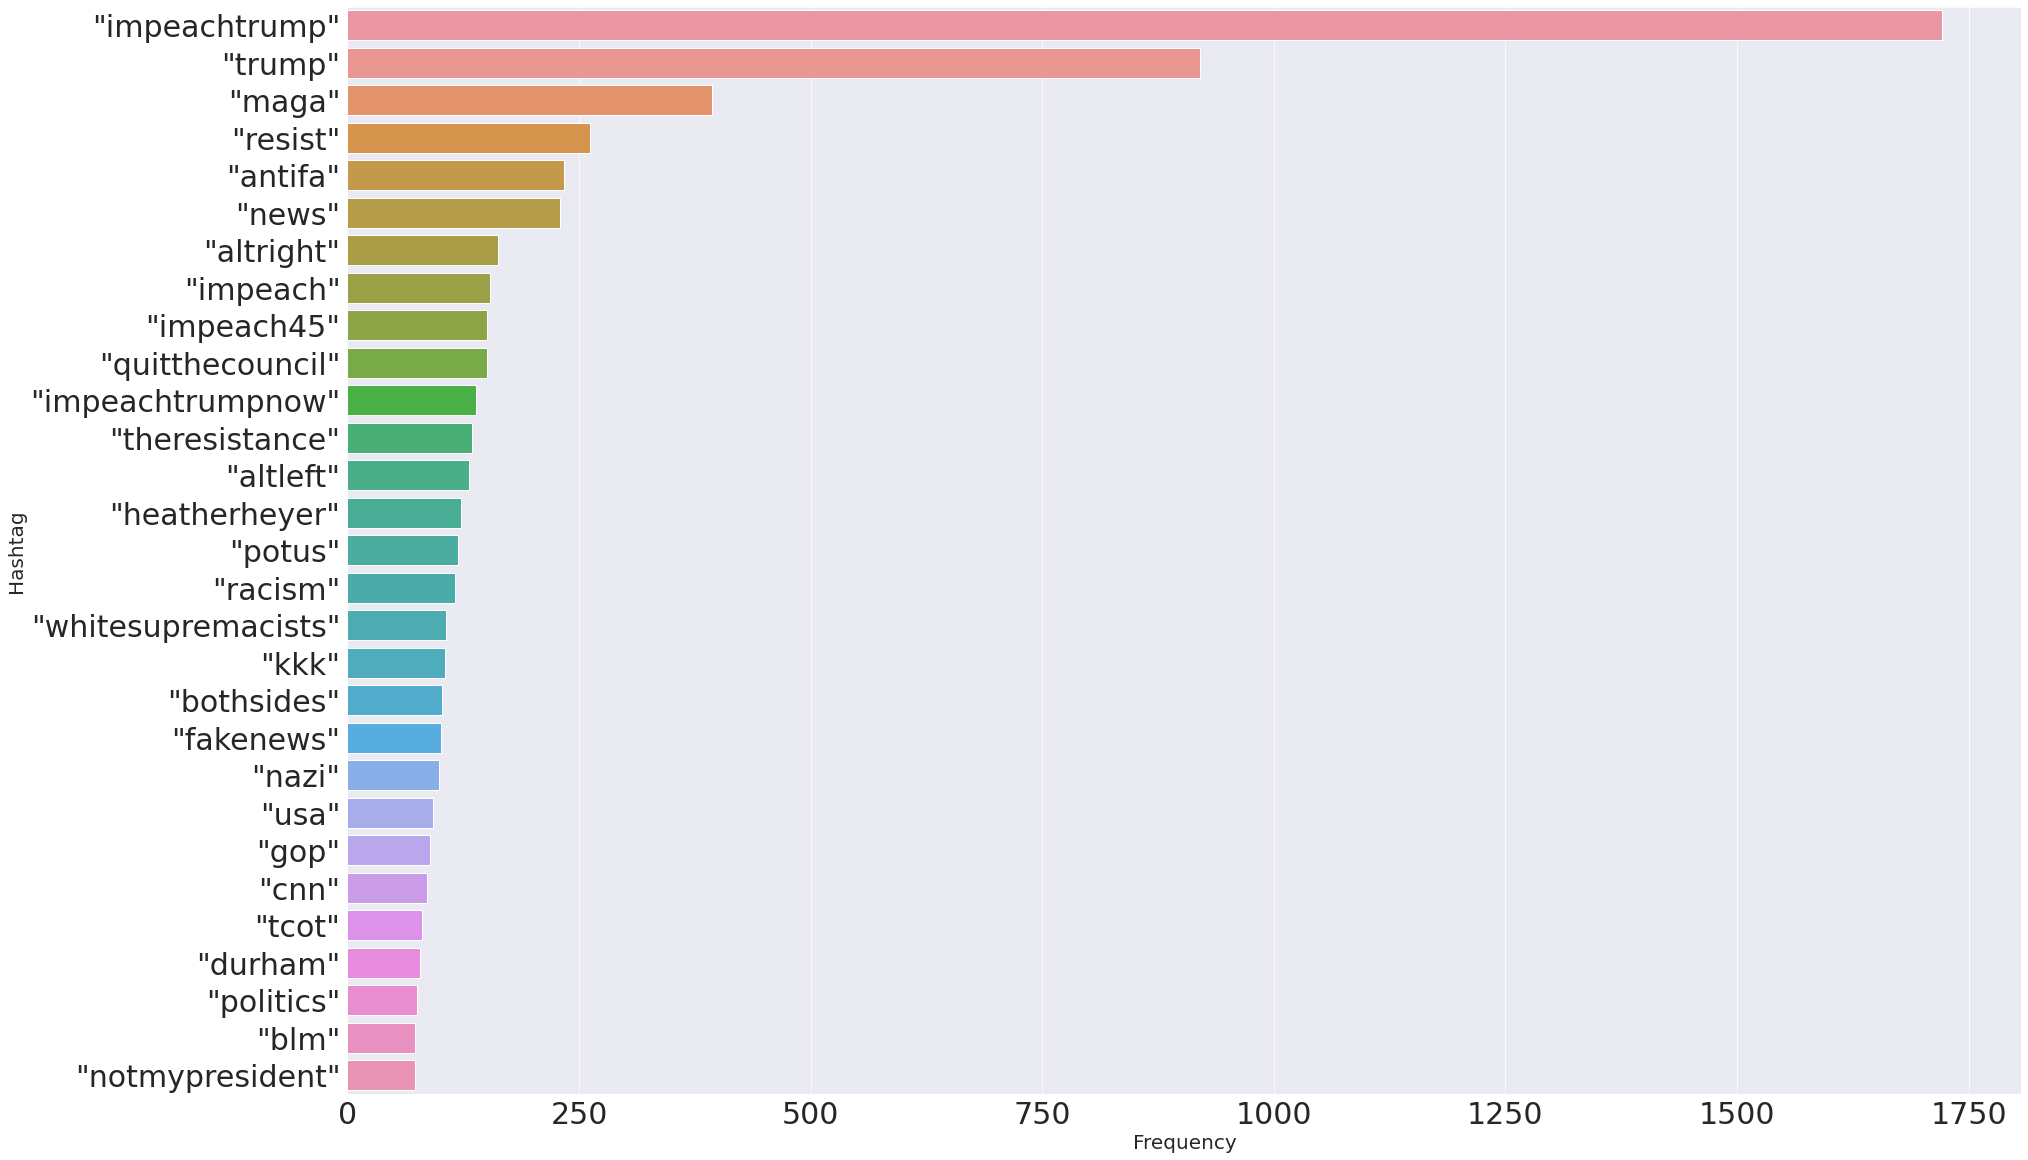

In [12]:
sns.set_style("darkgrid")
ax = sns.barplot(y=hashtgs.index, x='Frequency', data=hashtgs)
ax.set_xlabel("Frequency",fontsize=20)
ax.set_ylabel("Hashtag",fontsize=20)
ax.tick_params(labelsize=30)

#Let's see the tweets traffic timing 

In [13]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'])
tweets = tweets.set_index('created_at')
df = tweets[['id']]
tweet_volume = df.resample('10min').count()

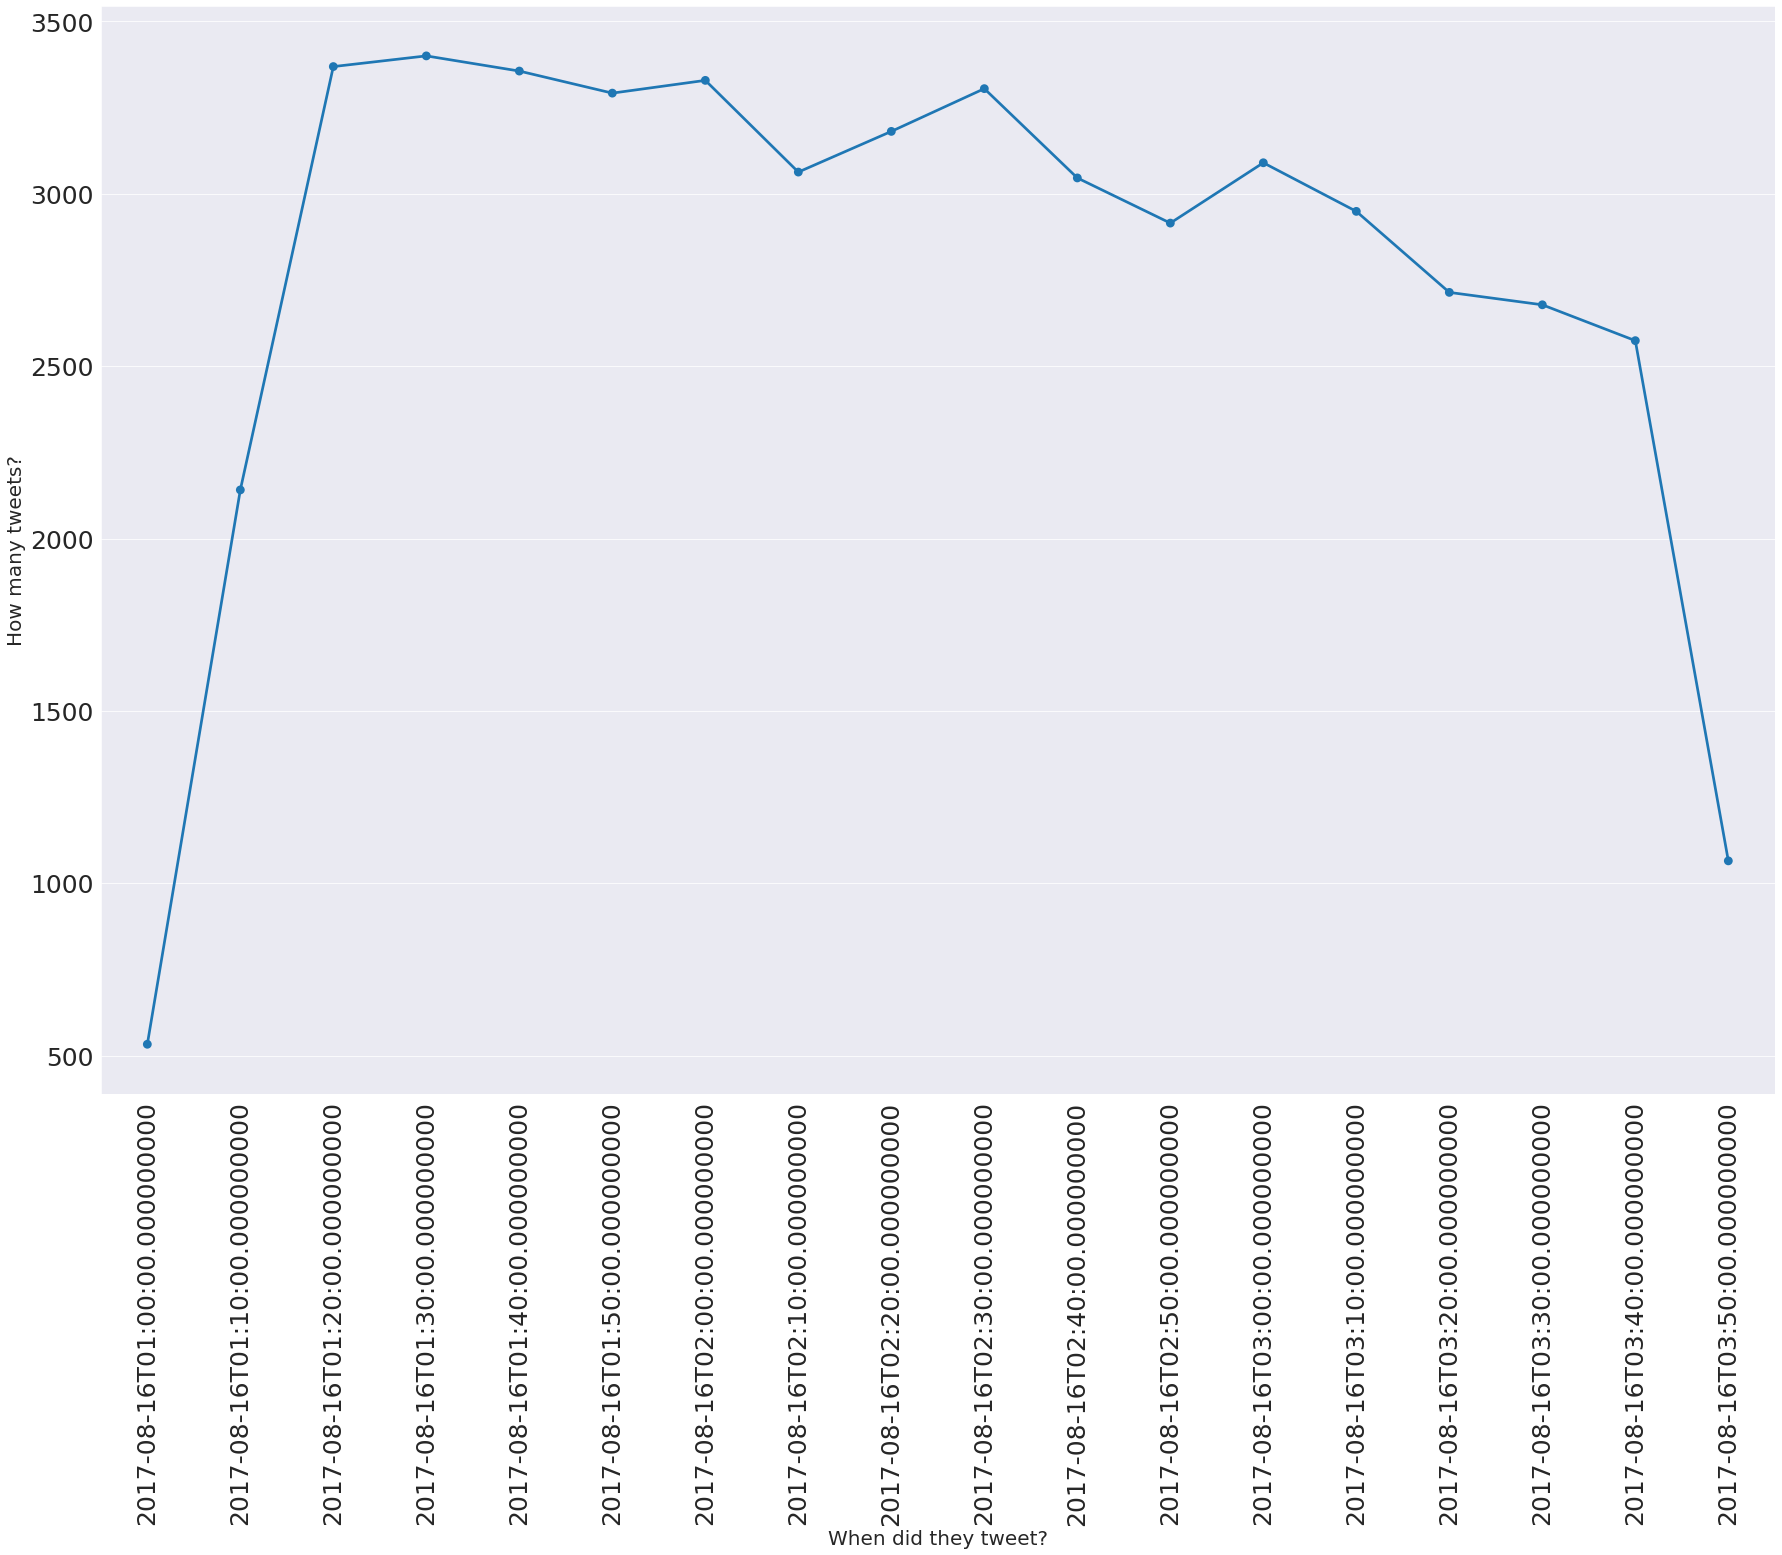

In [15]:
ax = sns.pointplot(x=tweet_volume.index, y='id', data=tweet_volume)
ax.set_xlabel("When did they tweet?",fontsize=20)
ax.set_ylabel("How many tweets?",fontsize=20)

ax.tick_params(labelsize=25)

for item in ax.get_xticklabels():
    item.set_rotation(90)

#We have a list of users in the conversation who has the biggest number of followers. Not surprisingly, all of them were media organizations such as CNN or Reuters.

In [16]:
influential = tweets[['user_name', 'followers_count']]
influential = influential.sort_values('followers_count', ascending=False)
influential.groupby('user_name').first().sort_values(by='followers_count', ascending=False)[:10]

,followers_count
user_name,
CNN,37067971
Reuters Top News,18494616
Fox News,15636365
TIME,14518616
ABC News,11495209
Washington Post,10908284
HuffPost,10606070
Mashable,9205958
People,7817745


#These are the users who tweeted the most over the span of 3 hours. We have three users who tweeted over 100 times in 3 hours! Some people are really passionate about thi

In [17]:
tweets['screen_name'].value_counts()[:10]

socalhomes411      119
corrigan_david     116
ArisaRoyal         106
BinkyDLA            81
Rightingtheship     79
Foods4u             69
partermaytr2        47
The1stLadyLove      42
GrasslandDesign     42
ToBeSafeNSound      40
Name: screen_name, dtype: int64

In [21]:
# clustering algorithms
pd.options.mode.chained_assignment = None
# nltk for nlp
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
# list of stopwords like articles, preposition
stop = set(stopwords.words('english'))
from string import punctuation
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
def tokenizer(text):
    try:
        tokens_ = [word_tokenize(sent) for sent in sent_tokenize(text)]
        
        tokens = []
        for token_by_sent in tokens_:
            tokens += token_by_sent

        tokens = list(filter(lambda t: t.lower() not in stop, tokens))
        tokens = list(filter(lambda t: t not in punctuation, tokens))
        tokens = list(filter(lambda t: t not in [u"'s", u"n't", u"...", u"''", u'``', u'amp', u'https',
                                                u'via', u"'re"], tokens))
        filtered_tokens = []
        for token in tokens:
            if re.search('[a-zA-Z]', token):
                filtered_tokens.append(token)

        filtered_tokens = list(map(lambda token: token.lower(), filtered_tokens))

        return filtered_tokens
    except Error as e:
        print(e)

In [22]:
tweets['tokens'] = tweets['full_text'].map(tokenizer)
for full_text, tokens in zip(tweets['full_text'].head(5), tweets['tokens'].head(5)):
    print('full text:', full_text)
    print('tokens:', tokens)
    print()      

full text: It's almost as if people are exactly who they say they are https://t.co/MnWFXZd9c3
tokens: ['almost', 'people', 'exactly', 'say', '//t.co/mnwfxzd9c3']

full text: @Slate Conservative media: Yes, Trump's response to Charlottesville was bad, but what about Obama? https://t.co/jjINXL5Qp0 via @slate
tokens: ['slate', 'conservative', 'media', 'yes', 'trump', 'response', 'charlottesville', 'bad', 'obama', '//t.co/jjinxl5qp0', 'slate']

full text: 👀 https://t.co/qeyzYeblwu
tokens: ['//t.co/qeyzyeblwu']

full text: 😂 😂 😂 Karma really isn't wasting time.. https://t.co/JYRqf6vlSX
tokens: ['karma', 'really', 'wasting', 'time..', '//t.co/jyrqf6vlsx']

full text: After Charlottesville, Black Lives Matter Issues New Demand - https://t.co/Vuw3IvrhL2
tokens: ['charlottesville', 'black', 'lives', 'matter', 'issues', 'new', 'demand', '//t.co/vuw3ivrhl2']



,tfidf
'a,9.421903
issuing,9.421903
take back,9.421903
invoke,9.421903
invented,9.421903
take look,9.421903
way go,9.421903
insane charlottesville,9.421903
tan,9.421903
taste,9.421903


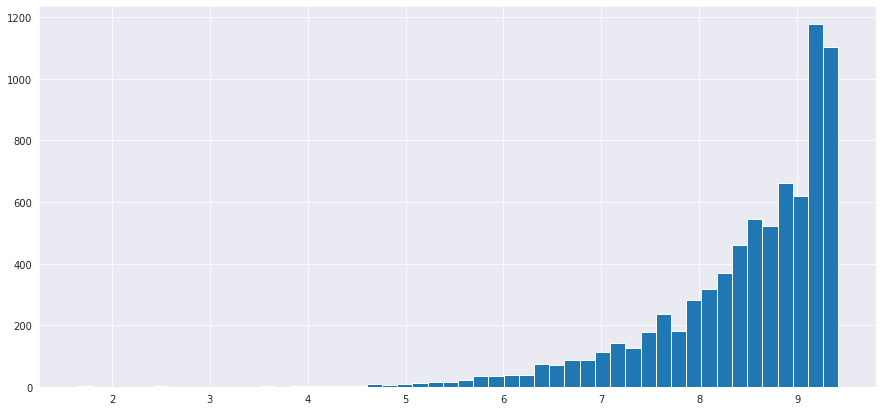

In [23]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10, max_features=10000, tokenizer=tokenizer, ngram_range=(1, 2))
vz = vectorizer.fit_transform(list(tweets['full_text']))
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']
tfidf.tfidf.hist(bins=50, figsize=(15,7))


tfidf.sort_values(by=['tfidf'], ascending=False).head(30)

#We used k-means clustering algorithms to generate a list of words that appear frequently together, and the results are shown above.

In [24]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.cluster import MiniBatchKMeans

num_clusters = 10
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(vz)
kmeans_clusters = kmeans.predict(vz)
kmeans_distances = kmeans.transform(vz)

#Here we can see that there is a thread of conversation that we couldn’t detect from the word frequency list. One example of this is Cluster #3, where a pocket of people expressed their displeasure with CNN coverage. K-means clustering is surely a great way to complement our word frequency tally.

In [25]:
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i)
    aux = ''
    for j in sorted_centroids[i, :10]:
        aux += terms[j] + ' | '
    print(aux)
    print()

Cluster 0:
realdonaldtrump | impeachtrump | charlottesville | people | like | one | potus | right | nazis | nazi | 

Cluster 1:
tweet | history | most-liked | most-liked tweet | tweet history | obama charlottesville | obama | became most-liked | response became | became | 

Cluster 2:
charlottesville | trump | sides | trump charlottesville | de | donald | donald trump | news | response | latest | 

Cluster 3:
press conference | press | conference | charlottesville press | trump charlottesville | donald | donald trump | fox news | fox | conference roots | 

Cluster 4:
watch | vice | vice news | news | race terror | terror | charlottesville race | race | news tonight | tonight | 

Cluster 5:
president | president trump | trump | charlottesville | remarks | president united | lebron | realdonaldtrump | thank | thank president | 

Cluster 6:
violence | charlottesville violence | charlottesville | violence charlottesville | sides | trump | blame | sides charlottesville | blame sides | alt-l